In [50]:
import matplotlib.pyplot as plt
import source.data
import torch
_  = torch.manual_seed(0)

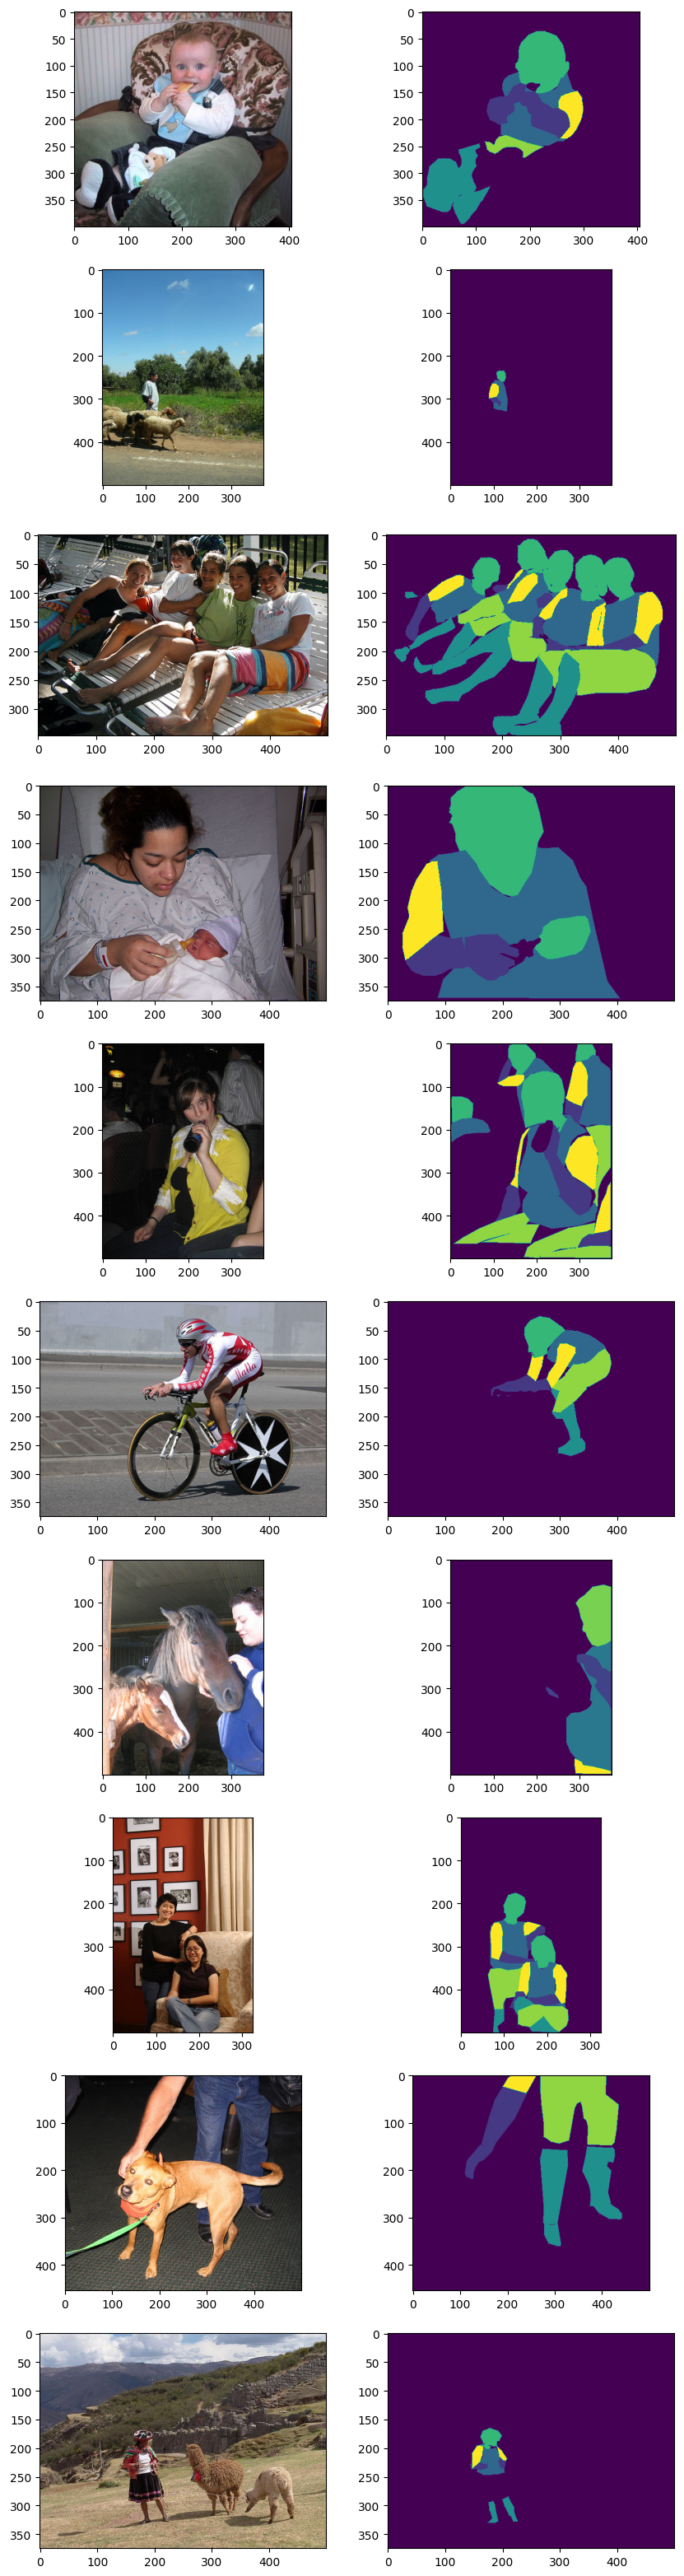

In [51]:
dataset = source.data.PascalPartDataset()
random_indexes = torch.randint(low=0, high=len(dataset), size=(10,))
figure = plt.figure(figsize=(10, 40))
for count, index in enumerate(random_indexes):
    image_as_tensor, mask_as_tensor = dataset[index]
    figure.add_subplot(10, 2, 2*count + 1)
    plt.imshow(image_as_tensor.permute(1, 2, 0))
    figure.add_subplot(10, 2, 2*count + 2)
    plt.imshow(mask_as_tensor)
plt.show()

In [52]:
shapes = []
min_height, min_width = 1000, 1000
max_height, max_width = 0, 0
sum_along_image_channels = torch.zeros(3)
pixel_count = 0

for index in range(len(dataset)):

    image, mask = dataset[index]
    shape = image.shape

    shapes.append(image.shape) # C H W

    min_height = min(min_height, shape[1])
    max_height = max(max_height, shape[1])

    min_width = min(min_width, shape[2])
    max_width = max(max_width, shape[2])

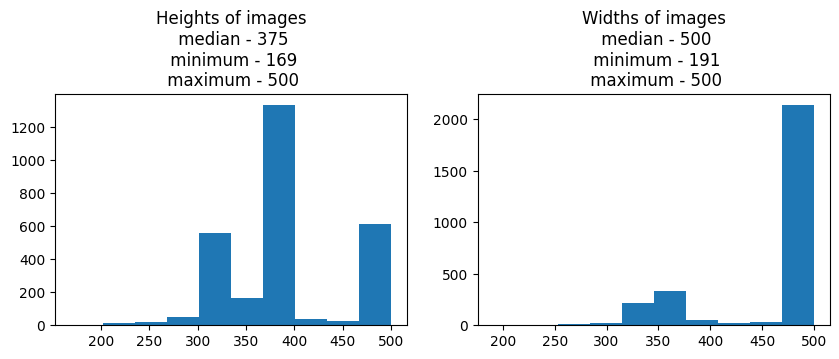

In [55]:
import matplotlib.pyplot as plt
from statistics import median

figure = plt.figure(figsize=(10, 3))

median_height = int(median([height for _, height, _ in shapes]))

figure.add_subplot(1, 2, 1)
plt.hist([height for _, height, _ in shapes])
plt.title(
    "Heights of images" +
    f"\n median - {median_height}" +
    f"\n minimum - {min_height}"+
    f"\n maximum - {max_height}"
)


median_width = int(median([width for _, _, width in shapes]))

figure.add_subplot(1, 2, 2)
plt.hist([width for _, _, width in shapes])
plt.title(f"Widths of images" +
    f"\n median - {median_width}" +
    f"\n minimum - {min_width}"+
    f"\n maximum - {max_width}"
)

plt.show()